In [3]:
import numpy
import scipy
import seaborn
import pandas
import struct
import matplotlib.pyplot as plt
%matplotlib ipympl

In [4]:
plt.close("all")

In [5]:
# parameters
# sample_size = 20
# sig_level = 0.05
hit_str = "not rejected"
miss_str = "rejected"

In [6]:
test_type = []
tested_sig_level = []
tested_sample_size = []
outcome = []
n_occurences = []
tested_df = []

for sample_size in [5, 10, 20, 50, 100, 500, 1000]:
    for sig_level in [0.05]:
        for df in [1, 2, 3, 5, 10]:
            hits_k = 0
            misses_k = 0

            hits_s = 0
            misses_s = 0
            for _ in range(0, 1000):
                # generate normal distribution sample
                normal_sample = numpy.random.standard_t(df, size=sample_size)

                # test Kolmogorov-Smirnov
                stat, p_value = scipy.stats.kstest(normal_sample, "norm")
                if p_value > sig_level:
                    hits_k = hits_k + 1
                else:
                    misses_k = misses_k + 1
                
                # test Shapiro-Wilk
                res = scipy.stats.shapiro(normal_sample)
                if res.pvalue > sig_level:
                    hits_s = hits_s + 1
                else:
                    misses_s = misses_s + 1
            
            # gather results
            test_type.append("Kolmogorov-Smirnov")
            tested_sig_level.append(sig_level)
            tested_sample_size.append(sample_size)
            outcome.append(hit_str)
            n_occurences.append(hits_k)
            tested_df.append(df)

            test_type.append("Kolmogorov-Smirnov")
            tested_sig_level.append(sig_level)
            tested_sample_size.append(sample_size)
            outcome.append(miss_str)
            n_occurences.append(misses_k)
            tested_df.append(df)


            test_type.append("Shapiro-Wilk")
            tested_sig_level.append(sig_level)
            tested_sample_size.append(sample_size)
            outcome.append(hit_str)
            n_occurences.append(hits_s)
            tested_df.append(df)

            test_type.append("Shapiro-Wilk")
            tested_sig_level.append(sig_level)
            tested_sample_size.append(sample_size)
            outcome.append(miss_str)
            n_occurences.append(misses_s)
            tested_df.append(df)


results = pandas.DataFrame({"test type": test_type, 
                            "significane level": tested_sig_level, 
                            "sample size": tested_sample_size, 
                            "count": n_occurences,
                            "hpothesis": outcome,
                            "degrees of freedom": tested_df})

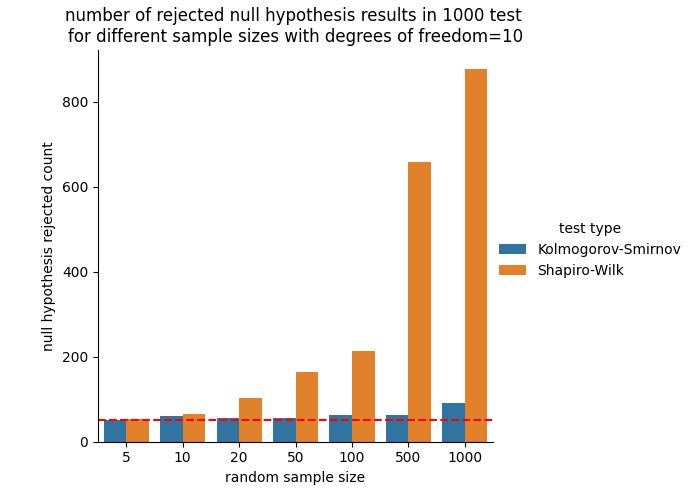

In [17]:
#plt.figure()
deg_of_free = 10
g = seaborn.catplot(data=results[(results["hpothesis"] == miss_str) & (results["degrees of freedom"] == deg_of_free)],
                x="sample size",
                y="count",
                hue="test type",
                kind="bar",
                errorbar=None)
g.fig.subplots_adjust(top=.9)
plt.axhline(y=(sig_level)*1000, color='r', linestyle='--', label='expected result')
plt.xlabel("random sample size")
plt.ylabel("null hypothesis rejected count")
plt.title("number of rejected null hypothesis results in 1000 test \nfor different sample sizes with degrees of freedom=" + str(deg_of_free))
plt.ylim(0, 1000)
plt.show()

T student distribution tests